# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [38]:
from xmltodict import parse
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

import pandas as pd
import json
import yaml

import numpy as np

# 1) Q1

In [39]:
data_jan = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv')
data_jan  # 2021 january dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-01-11 11:00:00,2,RAY,KABATAŞ-MAHMUTBEY,2,AKTARMA,541,545
1,2021-01-18 06:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,1834,1867
2,2021-01-01 17:00:00,1,KARAYOLU,İETT,2,NORMAL,7406,7868
3,2021-01-18 20:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,7064,7199
4,2021-01-22 05:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,712,713
...,...,...,...,...,...,...,...,...
22122,2021-01-19 21:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,1445,1447
22123,2021-01-15 22:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,122,123
22124,2021-01-08 15:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,3641,3720
22125,2021-01-08 10:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,7380,7857


In [40]:
data_may = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv")
data_may # 2021 may dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2021-05-01 14:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,88,88
1,2021-05-03 16:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,5311,5356
2,2021-05-01 06:00:00,2.0,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,129,129
3,2021-05-03 12:00:00,2.0,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2574,2641
4,2021-05-03 07:00:00,2.0,RAY,TAKSİM-4.LEVENT,2,AKTARMA,1038,1038
...,...,...,...,...,...,...,...,...
1785,2021-05-02 15:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,134,134
1786,2021-05-03 09:00:00,2.0,RAY,İETT TÜNEL,2,AKTARMA,29,29
1787,2021-05-02 09:00:00,3.0,DENİZ,MOTOR TEKNE,2,NORMAL,109,111
1788,2021-05-02 23:00:00,2.0,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,NORMAL,2,2


In [41]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22127 entries, 0 to 22126
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DATE_TIME            22127 non-null  object
 1   TRANSPORT_TYPE_ID    22127 non-null  int64 
 2   TRANSPORT_TYPE_DESC  22127 non-null  object
 3   LINE                 22127 non-null  object
 4   TRANSFER_TYPE_ID     22127 non-null  int64 
 5   TRANSFER_TYPE        22127 non-null  object
 6   NUMBER_OF_PASSENGER  22127 non-null  int64 
 7   NUMBER_OF_PASSAGE    22127 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.4+ MB


In [42]:
data_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            1790 non-null   object 
 1   TRANSPORT_TYPE_ID    1787 non-null   float64
 2   TRANSPORT_TYPE_DESC  1787 non-null   object 
 3   LINE                 1787 non-null   object 
 4   TRANSFER_TYPE_ID     1790 non-null   int64  
 5   TRANSFER_TYPE        1790 non-null   object 
 6   NUMBER_OF_PASSENGER  1790 non-null   int64  
 7   NUMBER_OF_PASSAGE    1790 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 112.0+ KB


## ANSWER TO Q1 : only difference im seeing is transport_Type_ID column type is different and there is only 3 days of data in may

## date sort function and changing in dataframe

In [43]:
def dateSort(data_month):
    return data_month.sort_values(by=["DATE_TIME"],inplace=True)
dateSort(data_jan)
dateSort(data_may)

## function for null check, sort value by column

In [44]:
def  Nanvalues(data_mon):
    mon_null = data_mon.isnull().sum()
    return mon_null


In [45]:
def sort_value(data_month,name):
    return data_month.sort_values(name,ascending=False)



 creating data frame for total passengers of different transportation types

In [46]:
data_jan_sum = data_jan.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
df_2 = pd.DataFrame(data_jan_sum)
df_2




,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER
0,2021-01-01 00:00:00,KARAYOLU,583
1,2021-01-01 00:00:00,RAY,247
2,2021-01-01 01:00:00,DENİZ,1
3,2021-01-01 01:00:00,KARAYOLU,182
4,2021-01-01 01:00:00,RAY,8
...,...,...,...
2205,2021-01-31 22:00:00,KARAYOLU,3798
2206,2021-01-31 22:00:00,RAY,4354
2207,2021-01-31 23:00:00,DENİZ,29
2208,2021-01-31 23:00:00,KARAYOLU,1573


In [47]:
data_may_sum = data_may.groupby(["DATE_TIME","TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
df_1 = pd.DataFrame(data_may_sum)
df_1

,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER
0,2021-05-01 00:00:00,DENİZ,4
1,2021-05-01 00:00:00,KARAYOLU,814
2,2021-05-01 00:00:00,RAY,44
3,2021-05-01 01:00:00,DENİZ,1
4,2021-05-01 01:00:00,KARAYOLU,231
...,...,...,...
211,2021-05-03 22:00:00,KARAYOLU,9612
212,2021-05-03 22:00:00,RAY,599
213,2021-05-03 23:00:00,DENİZ,31
214,2021-05-03 23:00:00,KARAYOLU,3522


In [48]:
data_jan_sum1 = data_jan.groupby(["TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum() # january 2021
df_1 = pd.DataFrame(data_jan_sum)
df_1["Percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1




,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER,Percent
0,2021-01-01 00:00:00,KARAYOLU,583,0.000784
1,2021-01-01 00:00:00,RAY,247,0.000332
2,2021-01-01 01:00:00,DENİZ,1,0.000001
3,2021-01-01 01:00:00,KARAYOLU,182,0.000245
4,2021-01-01 01:00:00,RAY,8,0.000011
...,...,...,...,...
2205,2021-01-31 22:00:00,KARAYOLU,3798,0.005108
2206,2021-01-31 22:00:00,RAY,4354,0.005856
2207,2021-01-31 23:00:00,DENİZ,29,0.000039
2208,2021-01-31 23:00:00,KARAYOLU,1573,0.002116


In [49]:
data_may_sum1 = data_may.groupby(["TRANSPORT_TYPE_DESC"],as_index=False)["NUMBER_OF_PASSENGER"].sum() # may 2021
df_1 = pd.DataFrame(data_may_sum)
df_1["percent"] = (df_1["NUMBER_OF_PASSENGER"] / df_1["NUMBER_OF_PASSENGER"].sum()*100)
df_1


,DATE_TIME,TRANSPORT_TYPE_DESC,NUMBER_OF_PASSENGER,percent
0,2021-05-01 00:00:00,DENİZ,4,0.000151
1,2021-05-01 00:00:00,KARAYOLU,814,0.030775
2,2021-05-01 00:00:00,RAY,44,0.001664
3,2021-05-01 01:00:00,DENİZ,1,0.000038
4,2021-05-01 01:00:00,KARAYOLU,231,0.008733
...,...,...,...,...
211,2021-05-03 22:00:00,KARAYOLU,9612,0.363402
212,2021-05-03 22:00:00,RAY,599,0.022646
213,2021-05-03 23:00:00,DENİZ,31,0.001172
214,2021-05-03 23:00:00,KARAYOLU,3522,0.133157


In [50]:
#df_pivot = pd.pivot_table(data_jan, values="NUMBER_OF_PASSENGER",columns="TRANSPORT_TYPE_DESC")
#ax = df_pivot.plot(kind="bar",alpha=0.5)
#plt.show()

# 1) Q2
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.

In [51]:
data_jun = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv")
data_jun  # 2020 june dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-06-07 08:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,1829,1925
1,2020-06-07 22:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,NORMAL,2669,3110
2,2020-06-23 05:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,14,14
3,2020-06-28 11:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,51,51
4,2020-06-26 18:00:00,2,RAY,MARMARAY,2,NORMAL,19160,19794
...,...,...,...,...,...,...,...,...
19829,2020-06-24 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,62,63
19830,2020-06-22 08:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,138,138
19831,2020-06-12 10:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,3430,3529
19832,2020-06-29 12:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,103,106


In [57]:
data_sep = pd.read_csv("https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv")
data_sep # 2020 september dataset

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910
1,2020-09-16 09:00:00,2,RAY,TELEFERİK MAÇKA - TAŞKIŞLA,2,NORMAL,12,15
2,2020-09-15 12:00:00,2,RAY,KADIKÖY-MODA,2,NORMAL,84,88
3,2020-09-06 13:00:00,1,KARAYOLU,ÖHO,2,NORMAL,60045,69100
4,2020-09-26 13:00:00,2,RAY,TAKSİM-4.LEVENT,2,AKTARMA,3348,3379
...,...,...,...,...,...,...,...,...
22184,2020-09-28 12:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,1146,1147
22185,2020-09-29 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,17,17
22186,2020-09-08 13:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,AKTARMA,130,131
22187,2020-09-20 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,22,22


In [ ]:
dateSort(data_sep)
dateSort(data_jun)  


In [53]:
data_jun_sum = data_jun.groupby(["DATE_TIME","TRANSFER_TYPE"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
data_jun_sum

,DATE_TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,2020-06-01 00:00:00,NORMAL,1025
1,2020-06-01 01:00:00,NORMAL,306
2,2020-06-01 02:00:00,NORMAL,145
3,2020-06-01 03:00:00,NORMAL,97
4,2020-06-01 04:00:00,NORMAL,334
...,...,...,...
1351,2020-06-30 21:00:00,NORMAL,97971
1352,2020-06-30 22:00:00,AKTARMA,11819
1353,2020-06-30 22:00:00,NORMAL,70535
1354,2020-06-30 23:00:00,AKTARMA,5696


In [54]:
data_sep_sum = data_sep.groupby(["DATE_TIME","TRANSFER_TYPE"],as_index=False)["NUMBER_OF_PASSENGER"].sum()
data_sep_sum

,DATE_TIME,TRANSFER_TYPE,NUMBER_OF_PASSENGER
0,2020-09-01 00:00:00,AKTARMA,566
1,2020-09-01 00:00:00,NORMAL,7198
2,2020-09-01 01:00:00,AKTARMA,9
3,2020-09-01 01:00:00,NORMAL,1906
4,2020-09-01 02:00:00,NORMAL,960
...,...,...,...
1373,2020-09-30 21:00:00,NORMAL,104426
1374,2020-09-30 22:00:00,AKTARMA,10946
1375,2020-09-30 22:00:00,NORMAL,82908
1376,2020-09-30 23:00:00,AKTARMA,5777


# 1) Q3

<AxesSubplot:xlabel='DATE_TIME', ylabel='NUMBER_OF_PASSENGER'>

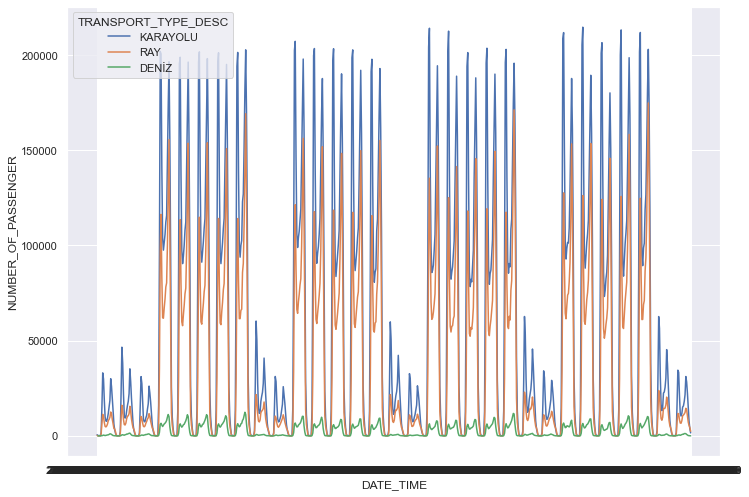

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data_jan_sum, x='DATE_TIME', y='NUMBER_OF_PASSENGER', hue='TRANSPORT_TYPE_DESC')

<AxesSubplot:xlabel='DATE_TIME', ylabel='NUMBER_OF_PASSENGER'>

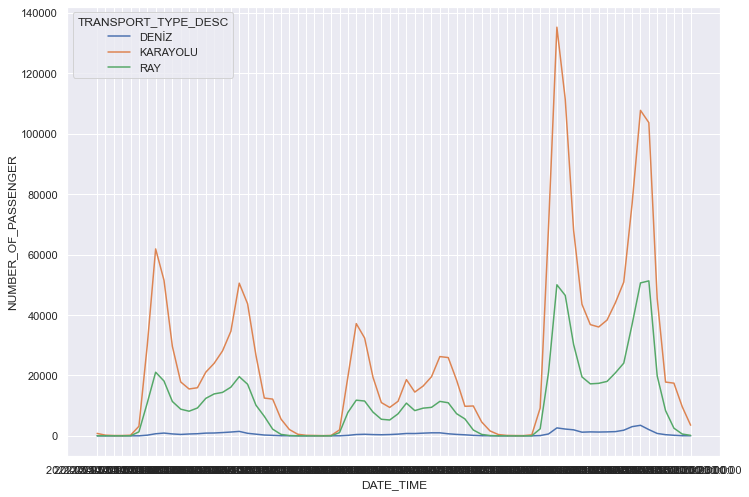

In [56]:
sns.lineplot(data=data_may_sum, x='DATE_TIME', y='NUMBER_OF_PASSENGER', hue='TRANSPORT_TYPE_DESC')

<AxesSubplot:xlabel='DATE_TIME', ylabel='NUMBER_OF_PASSENGER'>

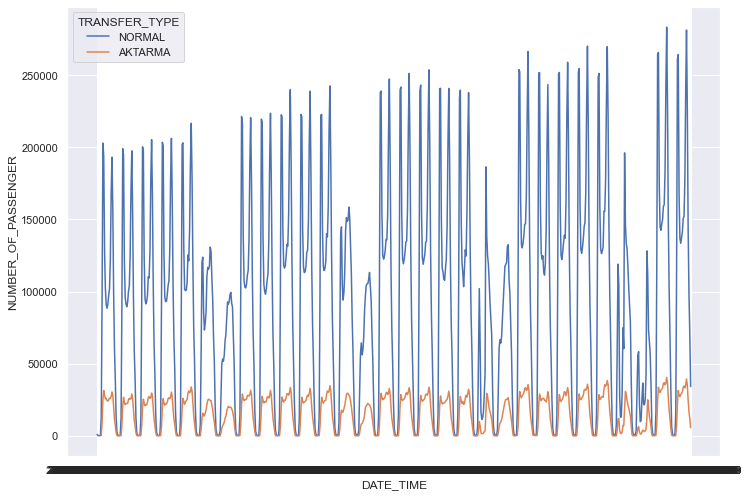

In [ ]:
sns.lineplot(data=data_jun_sum, x='DATE_TIME', y='NUMBER_OF_PASSENGER', hue='TRANSFER_TYPE')

In [ ]:
sns.lineplot(data=data_sep_sum, x='DATE_TIME', y='NUMBER_OF_PASSENGER', hue='TRANSFER_TYPE')

# 1)Q4
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020


In [ ]:
data_apr = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv')
data_apr # dataset april 2020

In [ ]:
dateSort(data_apr)
data_apr

In [ ]:
data_apr1 = data_apr.groupby(["DATE_TIME","LINE"],as_index=False)["NUMBER_OF_PASSENGER"].sum()    # first step of dataframe for our target columns
df_apr = pd.DataFrame(data_apr1)
df_apr


seperating time and date from DATE_TIME column

In [ ]:
from datetime import datetime

df_apr["TIME"] = pd.to_datetime(df_apr["DATE_TIME"]).dt.time
df_apr["DATE"] = pd.to_datetime(df_apr["DATE_TIME"]).dt.date
df_apr

In [ ]:
#df_apr = pd.DataFrame({'DATE':pd.date_range(start='2020-04-01',end='2020-04-02')})
#df_apr.DATE.dt.month




seperating day from date 

In [ ]:
df_apr["DATE"] = pd.to_datetime(df_apr['DATE'])
df_apr['DAY'] = df_apr['DATE'].dt.strftime('%d')
#df_apr = df_apr.reindex(columns=["DATE_TIME","LINE","TIME","DATE","DAY","NUMBER_OF_PASSENGER"])
#df_apr.drop("DATE_TIME",inplace=True,axis=1)
df_apr


## DAILY TOTALS FOR EACH LINE

In [ ]:
data_apr1 = df_apr.groupby(["DAY","LINE"],as_index=False)["NUMBER_OF_PASSENGER"].sum().sort_values(by=["NUMBER_OF_PASSENGER"],ascending=False)
data_apr1

### BUSIEST LINE IN EACH DAY

In [ ]:
busy_Line = data_apr1.drop_duplicates("DAY")
busy_Line




In [ ]:
busy_day1 = data_apr1.drop_duplicates("LINE")  # every line's busiest day
busy_day1

# 1) Q5
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?

In [ ]:
data_aug = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/a195a42f-727a-4f1e-ad55-471306788c99/download/hourly_transportation_202008.csv')
data_aug # dataset aug 2020

In [ ]:
data_aug["TIME"] = pd.to_datetime(data_aug["DATE_TIME"]).dt.time
data_aug["DATE"] = pd.to_datetime(data_aug["DATE_TIME"]).dt.date
data_aug["DATE"] = pd.to_datetime(data_aug['DATE'])
data_aug['DAY'] = data_aug['DATE'].dt.strftime('%d')
data_aug

In [ ]:
df_aug1 = data_aug.groupby(["DAY"],as_index=False)["NUMBER_OF_PASSENGER","NUMBER_OF_PASSAGE"].apply(lambda x : x.astype(int).sum())
df_aug1

In [ ]:
df_aug1["ratio"] = (df_aug1["NUMBER_OF_PASSENGER"] / df_aug1["NUMBER_OF_PASSAGE"])*100
df_aug1

answer : if we consider some people accidentally used istanbul kart extra then people are not illegaly passing turnstiles at the start of the month 

# Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

In [ ]:
import zipfile
from urllib.request import urlopen
import shutil


url = 'https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip'
file_name = 'fish_stableIsotopes_beaufort_stanek.zip'

# extracting zipfile from URL
with urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

    # extracting required file from zipfile
    with zipfile.ZipFile(file_name) as zf:
        zf.extract('fish_stableIsotopes_beaufort_stanek.csv')

# deleting the zipfile from the directory

# loading data from the file
data_fish = pd.read_csv('fish_stableIsotopes_beaufort_stanek.csv')
data_fish

In [ ]:
data_fish.info()

creating new column for only year

In [ ]:
data_fish["Date"] = pd.to_datetime(data_fish['Date'])
data_fish['Year'] = data_fish['Date'].dt.strftime('%Y')
data_fish

In [ ]:
data_fish[data_fish["Date"].isna()]


In [ ]:
df_1 = data_fish.groupby(["Location","Year"],as_index=False)["mmLength"].mean()
df_1

yes, mean length of fish got way bigger between years in 2018 and 2019

## 2) Q3

In [ ]:
df_2 = data_fish.groupby(["Location","Year"],as_index=False)["d13C","d15N"].apply(lambda x : x.mean())
df_2

In [ ]:
df_3 = data_fish.groupby(["Location","Year"]).agg({'d13C' : 'describe',
                                                   'd15N' : 'describe',
                                                   'mmLength' : 'mean'})
df_3

first of all, number of fish decreased after year 2018 that caused bigger length of fish and isotopes of C13 got bigger on the other hand N15 isotopes got bigger except Stefansson Sound
we can only compare year 2017 in fwe locations because we don't have any data on other locations 